## Task  1

In [1]:
Task1_inputdir = "/group/jug/ashesh/facility_imganfacuser_ashesh/Ashesh/NatureMethodsSegmentation/2404_D21-M3-S0-L8_6/"
Task1_segmentationdir = "/group/jug/ashesh/facility_imganfacuser_ashesh/Ashesh/NatureMethodsSegmentationOutputs/Analysis_2404_D21-m3-S0-L8_6/"
OUTPUT_DIR = "/group/jug/ashesh/naturemethods/segmentation/three_analysts/"

resolution_nm_dict = {
    "Task1": 110,
    "Task2": 110 / 60,
    "Task3": 110 / 60,
}

In [2]:
from disentangle.core.tiff_reader import load_tiff
import os

ch_idx = 0  # which channel are we interested in doing segmentation.
crop_size = 1600  # because the prediction is for top left 1600x1600, we need to crop the GT to match the size.
Task1_gt = load_tiff(os.path.join(Task1_inputdir, "GT.tif"))[:, :crop_size, :crop_size, :]
Task1_pred = load_tiff(os.path.join(Task1_inputdir, "pred_disentangle_2404_D21-M3-S0-L8_6_1.tif"))
Task1_pred = Task1_pred[..., :crop_size, :crop_size]
Task1_pred.shape, Task1_gt.shape

/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')


((5, 2, 1600, 1600), (5, 1600, 1600, 3))

In [3]:
Task1_input = Task1_gt[..., 2]
Task1_gt_ch = Task1_gt[..., ch_idx]
Task1_pred_ch = Task1_pred[:, ch_idx]
Task1_raw_dict = {"input": Task1_input, "pred": Task1_pred_ch, "GT": Task1_gt_ch}


In [4]:
from collections import defaultdict


def Task1_load_segmentation():
    # 2 level nested dictionary
    segmentation = defaultdict(lambda: defaultdict(list))
    for analystdir in os.listdir(Task1_segmentationdir):
        if os.path.isdir(os.path.join(Task1_segmentationdir, analystdir)):
            for subdir in [f"gt_ch{ch_idx + 1}", "superimposed", f"pred_ch{ch_idx + 1}"]:
                fpath = os.path.join(Task1_segmentationdir, analystdir, subdir, "Seg.tif")
                assert os.path.exists(fpath), f"File {fpath} does not exist"
                if subdir.startswith("gt_ch"):
                    key = "GT"
                elif subdir.startswith("pred_ch"):
                    key = "pred"
                elif subdir.startswith("superimposed"):
                    key = "input"
                else:
                    raise ValueError(f"Unknown subdir {subdir}")
                segmentation[analystdir][key].append(load_tiff(fpath)[..., :crop_size, :crop_size])
                if key == "input":
                    if analystdir != "data_JD":
                        segmentation[analystdir][key][-1] = segmentation[analystdir][key][-1] == ch_idx + 1
                    else:
                        segmentation[analystdir][key][-1] = segmentation[analystdir][key][-1] == (2 * (ch_idx + 1) % 3)
                print(analystdir, key, segmentation[analystdir][key][-1].shape)
    return segmentation

In [5]:
Task1_seg_data = Task1_load_segmentation()
# seg_data['data_JD']['input'][0] = seg_data['data_JD']['input'][0][None]
Task1_analysts = list(Task1_seg_data.keys())
Task1_analysts

data_DDN GT (5, 1600, 1600)
data_DDN input (5, 1600, 1600)
data_DDN pred (5, 1600, 1600)
data_JD GT (5, 1600, 1600)
data_JD input (5, 1600, 1600)
data_JD pred (5, 1600, 1600)
data_JMB GT (5, 1600, 1600)
data_JMB input (5, 1600, 1600)
data_JMB pred (5, 1600, 1600)


/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will

['data_DDN', 'data_JD', 'data_JMB']

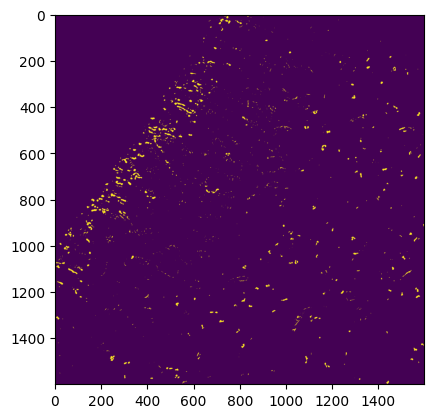

In [6]:
import matplotlib.pyplot as plt

plt.imshow(Task1_seg_data["data_JD"]["input"][0][0])

## Task 2

In [7]:
from disentangle.core.tiff_reader import load_tiff
from collections import defaultdict
import os

Task2_inputdir = "/group/jug/ashesh/facility_imganfacuser_ashesh/Ashesh/NatureMethodsSegmentation/2405_D18-M3-S0-L8_13/"
Task2_segmentationdir = "/group/jug/ashesh/facility_imganfacuser_ashesh/Ashesh/NatureMethodsSegmentationOutputs/Analysis_2405_D18-M3-S0-L8_13_1/"

Task2_ch_idx = 1  # which channel are we interested in doing segmentation.
Task2_gt = load_tiff(os.path.join(Task2_inputdir, "GT.tif"))
Task2_pred = load_tiff(os.path.join(Task2_inputdir, "pred_disentangle_2405_D18-M3-S0-L8_13_1.tif"))
Task2_pred.shape

Task2_input = Task2_gt[:, 0] + Task2_gt[:, 1]
Task2_gt_ch = Task2_gt[:, Task2_ch_idx]
Task2_pred_ch = Task2_pred[:, Task2_ch_idx]
Task2_raw_dict = {"input": Task2_input, "pred": Task2_pred_ch, "GT": Task2_gt_ch}


def Task2_load_segmentation():
    # 2 level nested dictionary
    segmentation = defaultdict(lambda: defaultdict(list))
    for analystdir in os.listdir(Task2_segmentationdir):
        if analystdir == ".DS_Store":
            continue

        for subdir in ["GT", "input", "pred"]:
            dirpath = os.path.join(Task2_segmentationdir, analystdir, subdir)
            fnames = [f"seg_{i}.tif" for i in range(0, 5)]
            fpaths = [os.path.join(dirpath, fname) for fname in fnames]
            for fpath in fpaths:
                segmentation[analystdir][subdir].append(load_tiff(fpath))
    return segmentation


Task2_seg_data = Task2_load_segmentation()
Task2_analysts = list(Task2_seg_data.keys())

/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will

## Task 3 

In [8]:
Task3_inputdir = "/group/jug/ashesh/facility_imganfacuser_ashesh/Ashesh/NatureMethodsSegmentation/2405_D18-M3-S0-L8_14/"
Task3_segmentationdir = "/group/jug/ashesh/facility_imganfacuser_ashesh/Ashesh/NatureMethodsSegmentationOutputs/Analysis_2405_D18-M3-S0-L8_14/"
Task3_ch_idx = 1  # which channel are we interested in doing segmentation.
Task3_gt = load_tiff(os.path.join(Task3_inputdir, "GT.tif"))
Task3_pred = load_tiff(os.path.join(Task3_inputdir, "pred_disentangle_2405_D18-M3-S0-L8_14_1.tif"))
Task3_pred.shape, Task3_gt.shape
Task3_input = (Task3_gt[:, 0] + Task3_gt[:, 1]) / 2
Task3_gt_ch = Task3_gt[:, Task3_ch_idx]
Task3_pred_ch = Task3_pred[:, Task3_ch_idx]
Task3_raw_dict = {"input": Task3_input, "pred": Task3_pred_ch, "GT": Task3_gt_ch}

Task3_seg_input = load_tiff(os.path.join(Task3_segmentationdir, "Segmentation3_Input.tif"))[None]
Task3_seg_pred = load_tiff(os.path.join(Task3_segmentationdir, "Segmentation3_Prediction.tif"))[None]
Task3_seg_GT = load_tiff(os.path.join(Task3_segmentationdir, "segmentation_GT.tif"))[None]

Task3_seg_input[Task3_seg_input == 255] = 1
Task3_seg_pred[Task3_seg_pred == 255] = 1
Task3_seg_GT[Task3_seg_GT == 255] = 1

# seg_data[analysts[an_idx]]['pred'][task1_img_idx]
Task3_seg_data = {"1": {"input": Task3_seg_input, "pred": Task3_seg_pred, "GT": Task3_seg_GT}}
Task3_analysts = ["1"]

/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will be removed in 0.27 (or later). To avoid this warning, please do not use the parameter `plugin`. Instead, use `imageio` or other I/O packages directly. See also `imread`.
  data = imread(path, plugin='tifffile')
/localscratch/code/Disentangle/disentangle/core/tiff_reader.py:9: FutureWarning: The plugin infrastructure in `skimage.io` and the parameter `plugin` are deprecated since version 0.25 and will

In [9]:
resolution_nm_dict

{'Task1': 110, 'Task2': 1.8333333333333333, 'Task3': 1.8333333333333333}

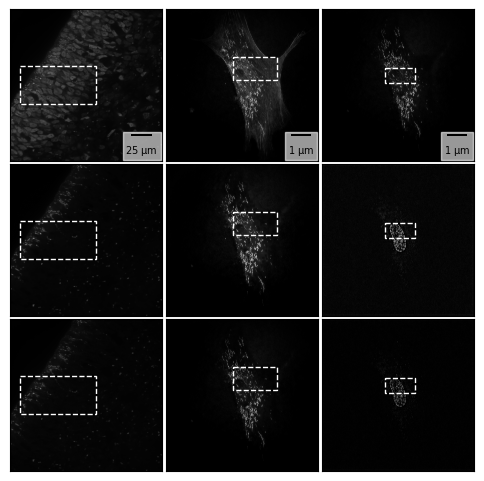

In [10]:
from disentangle.analysis.plot_utils import clean_ax
import matplotlib.patches as patches
from matplotlib_scalebar.scalebar import ScaleBar


task1_img_idx = 0
task2_img_idx = 0
task3_img_idx = 0
save_to_file = False

w_factor = 2
h_s1 = 600
h_e1 = 1000
w_s1 = 100
w_e1 = w_s1 + (h_e1 - h_s1) * w_factor

h_s2 = 1300
h_e2 = 1900
w_s2 = 1800
w_e2 = w_s2 + (h_e2 - h_s2) * w_factor

h_s3 = 1600
h_e3 = 2000
w_s3 = 1700
w_e3 = w_s3 + (h_e3 - h_s3) * w_factor

_, ax = plt.subplots(figsize=(6, 6), ncols=3, nrows=3)
ax[0, 0].imshow(Task1_raw_dict["input"][task1_img_idx], cmap="gray")
ax[0, 1].imshow(Task2_raw_dict["input"][task2_img_idx], cmap="gray")
ax[0, 2].imshow(Task3_raw_dict["input"][task3_img_idx], cmap="gray")
for i in range(3):
    scalebar = ScaleBar(
        resolution_nm_dict[f"Task{i + 1}"],
        "nm",
        box_alpha=0.6,
        frameon=True,
        location="lower right",
        font_properties={"size": 7},
    )
    ax[0, i].add_artist(scalebar)


ax[1, 0].imshow(Task1_raw_dict["pred"][task1_img_idx], cmap="gray")
ax[1, 1].imshow(Task2_raw_dict["pred"][task2_img_idx], cmap="gray")
ax[1, 2].imshow(Task3_raw_dict["pred"][task3_img_idx], cmap="gray")

ax[2, 0].imshow(Task1_raw_dict["GT"][task1_img_idx], cmap="gray")
ax[2, 1].imshow(Task2_raw_dict["GT"][task2_img_idx], cmap="gray")
ax[2, 2].imshow(Task3_raw_dict["GT"][task3_img_idx], cmap="gray")

# draw dotted rectangles using h_s, h_e, w_s, w_e
for i in range(3):
    rect = patches.Rectangle(
        (w_s1, h_s1), w_e1 - w_s1, h_e1 - h_s1, linewidth=1, edgecolor="w", linestyle="--", facecolor="none"
    )
    ax[i, 0].add_patch(rect)


for i in range(3):
    rect = patches.Rectangle(
        (w_s2, h_s2), w_e2 - w_s2, h_e2 - h_s2, linewidth=1, edgecolor="w", linestyle="--", facecolor="none"
    )
    ax[i, 1].add_patch(rect)

for i in range(3):
    rect = patches.Rectangle(
        (w_s3, h_s3), w_e3 - w_s3, h_e3 - h_s3, linewidth=1, edgecolor="w", linestyle="--", facecolor="none"
    )
    ax[i, 2].add_patch(rect)

#
# remove the space between the subplots
plt.subplots_adjust(wspace=0.02, hspace=0.02)
clean_ax(ax)
if save_to_file:
    fpath = os.path.join(
        OUTPUT_DIR,
        f"segmentation_3tasks_input_pred_gt_{h_s1}.{h_e1}-{w_s1}.{w_e1}_{h_s2}.{h_e2}-{w_s2}.{w_e2}_{h_s3}.{h_e3}-{w_s3}.{w_e3}.png",
    )
    plt.savefig(fpath, dpi=200)
    print(f"Saved to {fpath}")

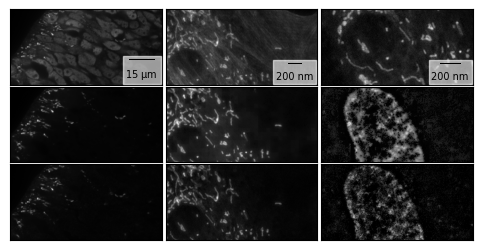

In [11]:
_, ax = plt.subplots(figsize=(3 * w_factor, 3), ncols=3, nrows=3)

ax[0, 0].imshow(Task1_raw_dict["input"][task1_img_idx][h_s1:h_e1, w_s1:w_e1], cmap="gray")
ax[0, 1].imshow(Task2_raw_dict["input"][task2_img_idx][h_s2:h_e2, w_s2:w_e2], cmap="gray")
ax[0, 2].imshow(Task3_raw_dict["input"][task3_img_idx][h_s3:h_e3, w_s3:w_e3], cmap="gray")

ax[1, 0].imshow(Task1_raw_dict["pred"][task1_img_idx][h_s1:h_e1, w_s1:w_e1], cmap="gray")
ax[1, 1].imshow(Task2_raw_dict["pred"][task2_img_idx][h_s2:h_e2, w_s2:w_e2], cmap="gray")
ax[1, 2].imshow(Task3_raw_dict["pred"][task3_img_idx][h_s3:h_e3, w_s3:w_e3], cmap="gray")

ax[2, 0].imshow(Task1_raw_dict["GT"][task1_img_idx][h_s1:h_e1, w_s1:w_e1], cmap="gray")
ax[2, 1].imshow(Task2_raw_dict["GT"][task2_img_idx][h_s2:h_e2, w_s2:w_e2], cmap="gray")
ax[2, 2].imshow(Task3_raw_dict["GT"][task3_img_idx][h_s3:h_e3, w_s3:w_e3], cmap="gray")


# scale bars
scalebar = ScaleBar(
    resolution_nm_dict["Task1"], "nm", box_alpha=0.6, frameon=True, location="lower right", font_properties={"size": 7}
)
ax[0, 0].add_artist(scalebar)

scalebar = ScaleBar(
    resolution_nm_dict["Task2"], "nm", box_alpha=0.6, frameon=True, location="lower right", font_properties={"size": 7}
)
ax[0, 1].add_artist(scalebar)

scalebar = ScaleBar(
    resolution_nm_dict["Task3"], "nm", box_alpha=0.6, frameon=True, location="lower right", font_properties={"size": 7}
)
ax[0, 2].add_artist(scalebar)

#
# remove the space between the subplots
plt.subplots_adjust(wspace=0.01, hspace=0.02)
clean_ax(ax)
if save_to_file:
    fpath = os.path.join(
        OUTPUT_DIR,
        f"segmentation_3tasks_input_pred_gt_crop_{h_s1}.{h_e1}-{w_s1}.{w_e1}_{h_s2}.{h_e2}-{w_s2}.{w_e2}_{h_s3}.{h_e3}-{w_s3}.{w_e3}.png",
    )
    plt.savefig(fpath, dpi=200)
    print(f"Saved to {fpath}")

In [12]:
for key in Task1_seg_data.keys():
    if len(Task1_seg_data[key]["pred"]) == 1:
        Task1_seg_data[key]["pred"] = Task1_seg_data[key]["pred"][0]
        Task1_seg_data[key]["GT"] = Task1_seg_data[key]["GT"][0]
        Task1_seg_data[key]["input"] = Task1_seg_data[key]["input"][0]

In [13]:
import numpy as np


def diff_img(seg1, seg2, seg3=None):
    assert set(np.unique(seg1)).issubset([0, 1]), f"Unique values in seg1 {np.unique(seg1)}"
    assert set(np.unique(seg2)).issubset([0, 1]), f"Unique values in seg2 {np.unique(seg2)}"
    if seg3 is not None:
        assert set(np.unique(seg3)).issubset([0, 1]), f"Unique values in seg3 {np.unique(seg3)}"

    if seg3 is None:
        seg3 = np.zeros_like(seg1, dtype=np.uint8)
        seg3[seg1 > 0] = 1
        seg3[seg2 > 0] = 1

    diff_img = np.stack([seg1, seg2, seg3], axis=-1) * 255
    diff_img = diff_img.astype(np.uint8)
    return diff_img

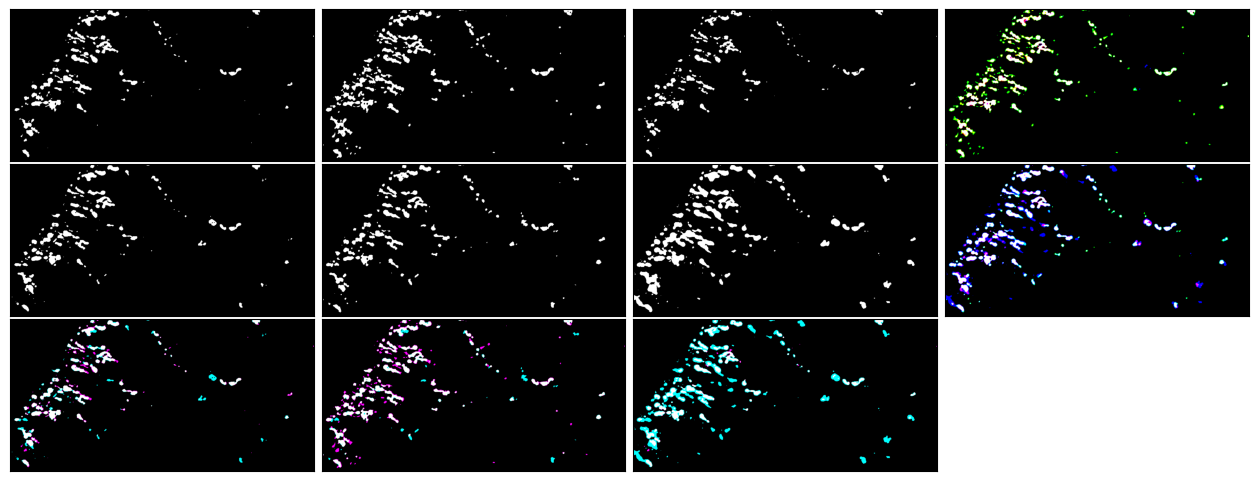

In [14]:
which_task = 1

save_to_file = False
img_sz = 2
_, ax = plt.subplots(figsize=(img_sz * w_factor * 4, img_sz * 3), ncols=4, nrows=3)
assert which_task in [1, 2, 3]
if which_task == 1:
    seg_data = Task1_seg_data
    analysts = Task1_analysts
    h_s = h_s1
    h_e = h_e1
    w_s = w_s1
    w_e = w_e1

    model_token = Task1_inputdir.strip("/").split("/")[-1]
elif which_task == 2:
    seg_data = Task2_seg_data
    analysts = Task2_analysts
    h_s = h_s2
    h_e = h_e2
    w_s = w_s2
    w_e = w_e2
    model_token = Task2_inputdir.strip("/").split("/")[-1]
elif which_task == 3:
    seg_data = Task3_seg_data
    analysts = Task3_analysts
    h_s = h_s3
    h_e = h_e3
    w_s = w_s3
    w_e = w_e3
    model_token = Task3_inputdir.strip("/").split("/")[-1]

for an_idx in range(3):
    if an_idx >= len(analysts):
        # draw a cross to show that the analyst is not available
        ax[0, an_idx].plot([0, 1600], [0, 1600], "0.8")
        ax[0, an_idx].plot([0, 1600], [1600, 0], "0.8")

        ax[1, an_idx].plot([0, 1600], [0, 1600], "0.8")
        ax[1, an_idx].plot([0, 1600], [1600, 0], "0.8")

        ax[2, an_idx].plot([0, 1600], [0, 1600], "0.8")
        ax[2, an_idx].plot([0, 1600], [1600, 0], c="0.8")
        continue

    pred_tmp = seg_data[analysts[an_idx]]["pred"][task1_img_idx]
    tar_tmp = seg_data[analysts[an_idx]]["GT"][task1_img_idx]
    ax[0, an_idx].imshow(pred_tmp[h_s:h_e, w_s:w_e], cmap="gray")
    ax[1, an_idx].imshow(tar_tmp[h_s:h_e, w_s:w_e], cmap="gray")
    ax[2, an_idx].imshow(diff_img(pred_tmp, tar_tmp)[h_s:h_e, w_s:w_e])
clean_ax(ax)

if len(analysts) == 1:
    ax[0, 3].plot([0, 1600], [0, 1600], "0.8")
    ax[0, 3].plot([0, 1600], [1600, 0], "0.8")

    ax[1, 3].plot([0, 1600], [0, 1600], "0.8")
    ax[1, 3].plot([0, 1600], [1600, 0], "0.8")
else:
    pred1 = seg_data[analysts[0]]["pred"][task1_img_idx]
    pred2 = seg_data[analysts[1]]["pred"][task1_img_idx]
    pred3 = seg_data[analysts[2]]["pred"][task1_img_idx]
    ax[0, 3].imshow(diff_img(pred1, pred2, pred3)[h_s:h_e, w_s:w_e])

    tar1 = seg_data[analysts[0]]["GT"][task1_img_idx]
    tar2 = seg_data[analysts[1]]["GT"][task1_img_idx]
    tar3 = seg_data[analysts[2]]["GT"][task1_img_idx]
    ax[1, 3].imshow(diff_img(tar1, tar2, tar3)[h_s:h_e, w_s:w_e])

# remove the space between the subplots
plt.subplots_adjust(wspace=0.02, hspace=0.02)
# here, we want to show pred1 with red, pred2 with green, pred3 with blue, all in the same plot axes.
# The intersection should be white
# disable the axes 3,3
ax[2, 3].axis("off")
if save_to_file:
    fpath = os.path.join(
        OUTPUT_DIR,
        f"segmentation_task_{model_token}_{h_s1}.{h_e1}-{w_s1}.{w_e1}_{h_s2}.{h_e2}-{w_s2}.{w_e2}_{h_s3}.{h_e3}-{w_s3}.{w_e3}.png",
    )
    plt.savefig(fpath, dpi=200)
    print(f"Saved to {fpath}")